In [2]:
from sklearn import ensemble, model_selection, metrics 

import numpy as np
import pandas as pd
import xgboost as xgb

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
dataset = pd.read_csv('dataset.csv')

In [7]:
dataset

,date,rate,eur_rub,jpy_rub,idl_vol,bas_dep,req_res,act_bal,org_num,rep_vol,sal_vol,res_gol,kop_dep,res_res
0,2013-12-20,5.50,45.0628,31.7234,355.70,34523683.0,402.3,1242.059677,926.0,2719845.0,-581.8,40640.0,104748.56,515590.0
1,2013-12-25,5.50,44.6520,31.3193,206.08,34523683.0,402.3,1242.059677,926.0,2719845.0,-1416.8,40640.0,97507.40,515590.0
2,2014-01-10,5.50,45.0672,31.6060,196.31,35277417.0,404.8,1067.077419,919.0,3139666.0,-793.0,39990.0,249552.32,509595.0
3,2014-01-15,5.50,45.4139,32.1410,207.05,35277417.0,404.8,1067.077419,919.0,3139666.0,-89.1,39990.0,136797.77,509595.0
4,2014-01-28,5.50,47.4962,33.8248,175.63,35277417.0,404.8,1067.077419,919.0,3139666.0,-287.6,39990.0,114920.59,509595.0
5,2014-02-05,5.50,47.9535,35.1044,456.66,35752062.0,412.3,1027.355357,914.0,2922692.0,-401.8,41715.0,62602.95,498926.0
6,2014-02-20,5.50,48.9730,34.8163,172.40,35752062.0,412.3,1027.355357,914.0,2922692.0,-12.1,41715.0,71068.19,498926.0
7,2014-02-25,5.50,48.7959,34.7298,243.65,35752062.0,412.3,1027.355357,914.0,2922692.0,-50.5,41715.0,66443.64,498926.0
8,2014-02-28,5.50,49.3454,35.2155,209.53,35752062.0,412.3,1027.355357,914.0,2922692.0,-50.4,41715.0,77589.55,498926.0
9,2014-03-05,7.00,49.9520,35.6383,260.77,36629577.0,439.9,1050.027419,904.0,2452200.0,-266.4,44588.0,72984.22,493326.0


Целевая переменная - ключевая ставка ЦБ, обучающая выборка - всё, кроме даты и ключевой ставки

In [8]:
y = dataset['rate']

In [9]:
X = dataset.iloc[:, 2:]

In [13]:
#y

In [15]:
#X

Формируем обучающие и тестовые выборки без перемешивания (без заглядывания в будущее), берём первые `90%` данных

In [151]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.10, shuffle=True)

In [152]:
n = 400 # кол-во решающих деревьев

In [153]:
estimator = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = n)

In [154]:
estimator.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [155]:
print(estimator.predict(X_test))
print(y_test.values)

[ 7.277714   5.499091   7.4848022 11.391248  14.022137   7.0833583
  7.389967  10.502467   7.717303   7.464987  11.018228   5.4992194
  7.7378683  7.5121584 10.070393   6.514492   7.2233458 11.549541
  8.408049   7.1294527  5.506582   9.596582   8.010735   8.50897
  6.956342   7.1799617 11.014707   7.500837   5.9047084]
[ 7.25  5.5   7.5  11.5  14.    7.    7.5  10.5   7.75  7.5  11.    5.5
  7.75  7.5  10.    6.5   7.25 11.5   8.25  7.25  5.5  17.    8.    8.5
  7.    7.25 11.    7.5   6.  ]


In [156]:
for i, el in enumerate(y_test.values):
    print(estimator.predict(X_test)[i], el)

7.277714 7.25
5.499091 5.5
7.4848022 7.5
11.391248 11.5
14.022137 14.0
7.0833583 7.0
7.389967 7.5
10.502467 10.5
7.717303 7.75
7.464987 7.5
11.018228 11.0
5.4992194 5.5
7.7378683 7.75
7.5121584 7.5
10.070393 10.0
6.514492 6.5
7.2233458 7.25
11.549541 11.5
8.408049 8.25
7.1294527 7.25
5.506582 5.5
9.596582 17.0
8.010735 8.0
8.50897 8.5
6.956342 7.0
7.1799617 7.25
11.014707 11.0
7.500837 7.5
5.9047084 6.0


In [157]:
y_test.keys()

Int64Index([204,   6,  23,  69,  56, 264, 218, 114, 242, 221,  99,   2, 239,
             19, 140, 267, 197,  66, 176, 255,   7,  45,  39, 171, 263, 253,
             89,  27, 282],
           dtype='int64')

In [158]:
dataset.loc[y_test.keys(),'date']

204    2018-06-28
6      2014-02-20
23     2014-06-25
69     2015-07-28
56     2015-04-01
264    2019-10-25
218    2018-10-10
114    2016-07-15
242    2019-04-10
221    2018-11-15
99     2016-03-25
2      2014-01-10
239    2019-03-20
19     2014-05-28
140    2017-02-10
267    2019-11-20
197    2018-04-28
66     2015-07-01
176    2017-11-15
255    2019-08-20
7      2014-02-25
45     2014-12-25
39     2014-10-28
171    2017-10-10
263    2019-10-15
253    2019-08-01
89     2016-01-15
27     2014-07-25
282    2020-04-10
Name: date, dtype: object

In [159]:
dates = dataset.loc[y_test.keys(),'date'].values

In [160]:
dates

array(['2018-06-28', '2014-02-20', '2014-06-25', '2015-07-28',
       '2015-04-01', '2019-10-25', '2018-10-10', '2016-07-15',
       '2019-04-10', '2018-11-15', '2016-03-25', '2014-01-10',
       '2019-03-20', '2014-05-28', '2017-02-10', '2019-11-20',
       '2018-04-28', '2015-07-01', '2017-11-15', '2019-08-20',
       '2014-02-25', '2014-12-25', '2014-10-28', '2017-10-10',
       '2019-10-15', '2019-08-01', '2016-01-15', '2014-07-25',
       '2020-04-10'], dtype=object)

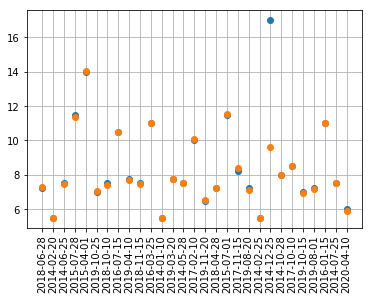

In [161]:
fig, ax = plt.subplots()
pyplot.plot_date(dates, y_test.values)
pyplot.plot_date(dates, estimator.predict(X_test))
ax.xaxis.set_tick_params(rotation=90, labelsize=10)
pylab.grid(True)

In [162]:
res_df = pd.DataFrame()

In [163]:
res_df = dataset.loc[y_test.keys(),('date', 'rate')]

In [164]:
res_df

,date,rate
204,2018-06-28,7.25
6,2014-02-20,5.50
23,2014-06-25,7.50
69,2015-07-28,11.50
56,2015-04-01,14.00
264,2019-10-25,7.00
218,2018-10-10,7.50
114,2016-07-15,10.50
242,2019-04-10,7.75
221,2018-11-15,7.50


In [165]:
res_df['prediction'] = estimator.predict(X_test)

In [166]:
res_df

,date,rate,prediction
204,2018-06-28,7.25,7.277714
6,2014-02-20,5.50,5.499091
23,2014-06-25,7.50,7.484802
69,2015-07-28,11.50,11.391248
56,2015-04-01,14.00,14.022137
264,2019-10-25,7.00,7.083358
218,2018-10-10,7.50,7.389967
114,2016-07-15,10.50,10.502467
242,2019-04-10,7.75,7.717303
221,2018-11-15,7.50,7.464987


In [167]:
sorted_df = res_df.sort_values(by=['date'])

In [168]:
sorted_df

,date,rate,prediction
2,2014-01-10,5.50,5.499219
6,2014-02-20,5.50,5.499091
7,2014-02-25,5.50,5.506582
19,2014-05-28,7.50,7.512158
23,2014-06-25,7.50,7.484802
27,2014-07-25,7.50,7.500837
39,2014-10-28,8.00,8.010735
45,2014-12-25,17.00,9.596582
56,2015-04-01,14.00,14.022137
66,2015-07-01,11.50,11.549541


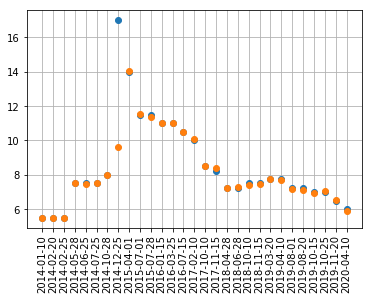

In [169]:
fig, ax = plt.subplots()
pyplot.plot_date(sorted_df['date'], sorted_df['rate'])
pyplot.plot_date(sorted_df['date'], sorted_df['prediction'])
ax.xaxis.set_tick_params(rotation=90, labelsize=10)
pylab.grid(True)